In [ ]:
!pip install plotly

In [1]:
import statsmodels.api as sm
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import plotly.express as px

In [2]:
df_cont = pd.read_csv("../data/countryContinent.csv", encoding="ISO-8859-1")
df_cont.head()

,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0


In [3]:
url = '../data/suicide_moredata.csv'

second_data = pd.read_csv(url)
second_data.tail()


,country,year,sex,age,suicides_no,population,suicidesper100k,country-year,yearlyHDI,GDPpyear,...,"Unemployment, total (% of total labor force) (modeled ILO estimate)","Physicians (per 1,000 people)",Strength of legal rights index (0=weak to 12=strong),"Labor force, total","Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Refugee population by country or territory of origin,"Contributing family workers, total (% of total employment) (modeled ILO estimate)",Access to electricity (% of population),"Lower secondary completion rate, total (% of relevant age group)"
15105,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,6.306708e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
15106,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,6.306708e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
15107,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,6.306708e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
15108,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,6.306708e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
15109,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,6.306708e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
second_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 26 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   country                                                                            15110 non-null  object 
 1   year                                                                               15110 non-null  int64  
 2   sex                                                                                15110 non-null  object 
 3   age                                                                                15110 non-null  object 
 4   suicides_no                                                                        15110 non-null  int64  
 5   population                                                                         15110 non-null  int

In [5]:
second_data.columns = ['country', 'year', 'sex', 'age', 'suicides_no', 'population','suicidesper100k', 'country-year', 'yearlyHDI',
    'GDPpyear', 'GDPpcapita', 'generation', 'suicide%', 'Internetusers', 'Expenses', 'employeecompensation','Unemployment', 'Physiciansp1000', 'Legalrights', 'Laborforcetotal','Lifeexpectancy', 'Mobilesubscriptionsp100','Refugees', 'Selfemployed', 'electricityacess', 'secondarycompletion']

In [6]:
second_data.year.unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [7]:
second_data.rename( {'GDPpyear':'yearly_gdp' } , axis=1 , inplace = True)
second_data.rename( {'GDPpcapita':'gdp_per_capita' } , axis=1 , inplace = True)
second_data.rename( {'yearlyHDI':'yearly_hdi' } , axis=1 , inplace = True)
second_data.rename( {'suicidesper100k':'sucid_in_hundredk' } , axis=1 , inplace = True)
second_data.rename( {'suicides_no':'suicides' } , axis=1 , inplace = True)
second_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  15110 non-null  object 
 1   year                     15110 non-null  int64  
 2   sex                      15110 non-null  object 
 3   age                      15110 non-null  object 
 4   suicides                 15110 non-null  int64  
 5   population               15110 non-null  int64  
 6   sucid_in_hundredk        15110 non-null  float64
 7   country-year             15110 non-null  object 
 8   yearly_hdi               4740 non-null   float64
 9   yearly_gdp               15110 non-null  float64
 10  gdp_per_capita           15110 non-null  int64  
 11  generation               15110 non-null  object 
 12  suicide%                 15110 non-null  float64
 13  Internetusers            15002 non-null  float64
 14  Expenses              

In [8]:
second_data.columns = map(str.lower, second_data.columns)

In [9]:
# remove special character
second_data.columns = second_data.columns.str.replace(' ', '')

In [10]:
second_data = second_data.merge(df_cont[['country', 'continent', 'code_3']])
second_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14366 entries, 0 to 14365
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  14366 non-null  object 
 1   year                     14366 non-null  int64  
 2   sex                      14366 non-null  object 
 3   age                      14366 non-null  object 
 4   suicides                 14366 non-null  int64  
 5   population               14366 non-null  int64  
 6   sucid_in_hundredk        14366 non-null  float64
 7   country-year             14366 non-null  object 
 8   yearly_hdi               4500 non-null   float64
 9   yearly_gdp               14366 non-null  float64
 10  gdp_per_capita           14366 non-null  int64  
 11  generation               14366 non-null  object 
 12  suicide%                 14366 non-null  float64
 13  internetusers            14258 non-null  float64
 14  expenses              

In [11]:
second_data.rename( {'code_3':'country_code' } , axis=1 , inplace = True)
second_data.rename( {'physiciansp1000':'physician_price' } , axis=1 , inplace = True)
second_data.rename( {'mobilesubscriptionsp100':'mobilesubscriptions' } , axis=1 , inplace = True)
second_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14366 entries, 0 to 14365
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               14366 non-null  object 
 1   year                  14366 non-null  int64  
 2   sex                   14366 non-null  object 
 3   age                   14366 non-null  object 
 4   suicides              14366 non-null  int64  
 5   population            14366 non-null  int64  
 6   sucid_in_hundredk     14366 non-null  float64
 7   country-year          14366 non-null  object 
 8   yearly_hdi            4500 non-null   float64
 9   yearly_gdp            14366 non-null  float64
 10  gdp_per_capita        14366 non-null  int64  
 11  generation            14366 non-null  object 
 12  suicide%              14366 non-null  float64
 13  internetusers         14258 non-null  float64
 14  expenses              12890 non-null  float64
 15  employeecompensatio

In [12]:
second_data.columns

Index(['country', 'year', 'sex', 'age', 'suicides', 'population',
       'sucid_in_hundredk', 'country-year', 'yearly_hdi', 'yearly_gdp',
       'gdp_per_capita', 'generation', 'suicide%', 'internetusers', 'expenses',
       'employeecompensation', 'unemployment', 'physician_price',
       'legalrights', 'laborforcetotal', 'lifeexpectancy',
       'mobilesubscriptions', 'refugees', 'selfemployed', 'electricityacess',
       'secondarycompletion', 'continent', 'country_code'],
      dtype='object')

In [13]:
second_data.shape

(14366, 28)

In [14]:
#good sample of the different regions.

countrynames = ['Argentina','Armenia','Australia',    'Austria',
    'Belgium',    'Brazil',    'Bulgaria',    'Canada',    'Chile',    'Colombia',    'Croatia',    'Cuba',    'Czech Republic',    'Denmark',
    'Finland',    'France',    'Germany',    'Greece',    'Hungary',    'Iceland',   'Ireland', 'Israel','Italy','Japan','Mexico', 'Netherlands','New Zealand','Norway','Poland', 'Portugal','Romania','Russian Federation','South Africa', 'Spain','Sweden', 'Switzerland','Thailand', 'Turkmenistan','Ukraine','United Kingdom', 'United States']

# countrynames

### Collapsing categories with string matching

In [15]:
countries_2 = second_data['country'].unique()
print(countries_2)

['Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Belgium'
 'Brazil' 'Bulgaria' 'Canada' 'Chile' 'Colombia' 'Croatia' 'Cuba'
 'Czech Republic' 'Denmark' 'Finland' 'France' 'Georgia' 'Germany'
 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan'
 'Mexico' 'Mongolia' 'Netherlands' 'New Zealand' 'Norway' 'Poland'
 'Portugal' 'Romania' 'Russian Federation' 'South Africa' 'Spain' 'Sweden'
 'Switzerland' 'Thailand' 'Turkey' 'Turkmenistan' 'Ukraine'
 'United Arab Emirates' 'Uzbekistan']


In [16]:
df1 = second_data.copy()
final = df1.iloc[np.where(df1.country == countrynames[0])]
for i, x in enumerate(countrynames[1:]):
    final = final.append(df1.iloc[np.where(df1.country == x)])
    
# df.head()

In [17]:
final.shape

(13276, 28)

In [18]:
final = final[final.year >= 1985]
final = final[final.year <= 2016]

In [19]:
final['country'] = final['country'].astype('category')
final['continent'] = final['continent'].astype('category')
final['sex'] = final['sex'].astype('category')
final['generation'] = final['generation'].astype('category')
final['age'] = final['age'].astype('category')

In [20]:
final.head(2)

,country,year,sex,age,suicides,population,sucid_in_hundredk,country-year,yearly_hdi,yearly_gdp,...,legalrights,laborforcetotal,lifeexpectancy,mobilesubscriptions,refugees,selfemployed,electricityacess,secondarycompletion,continent,country_code
0,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,0.694,8.841667e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Americas,ARG
1,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,0.694,8.841667e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Americas,ARG


### Missingness Data

In [21]:
# Get summary of missingness
final.isna().sum()

country                    0
year                       0
sex                        0
age                        0
suicides                   0
population                 0
sucid_in_hundredk          0
country-year               0
yearly_hdi              9124
yearly_gdp                 0
gdp_per_capita             0
generation                 0
suicide%                   0
internetusers             84
expenses                1152
employeecompensation    1200
unemployment               0
physician_price         2064
legalrights             8328
laborforcetotal            0
lifeexpectancy             0
mobilesubscriptions        0
refugees                 132
selfemployed               0
electricityacess         312
secondarycompletion     4956
continent                  0
country_code               0
dtype: int64

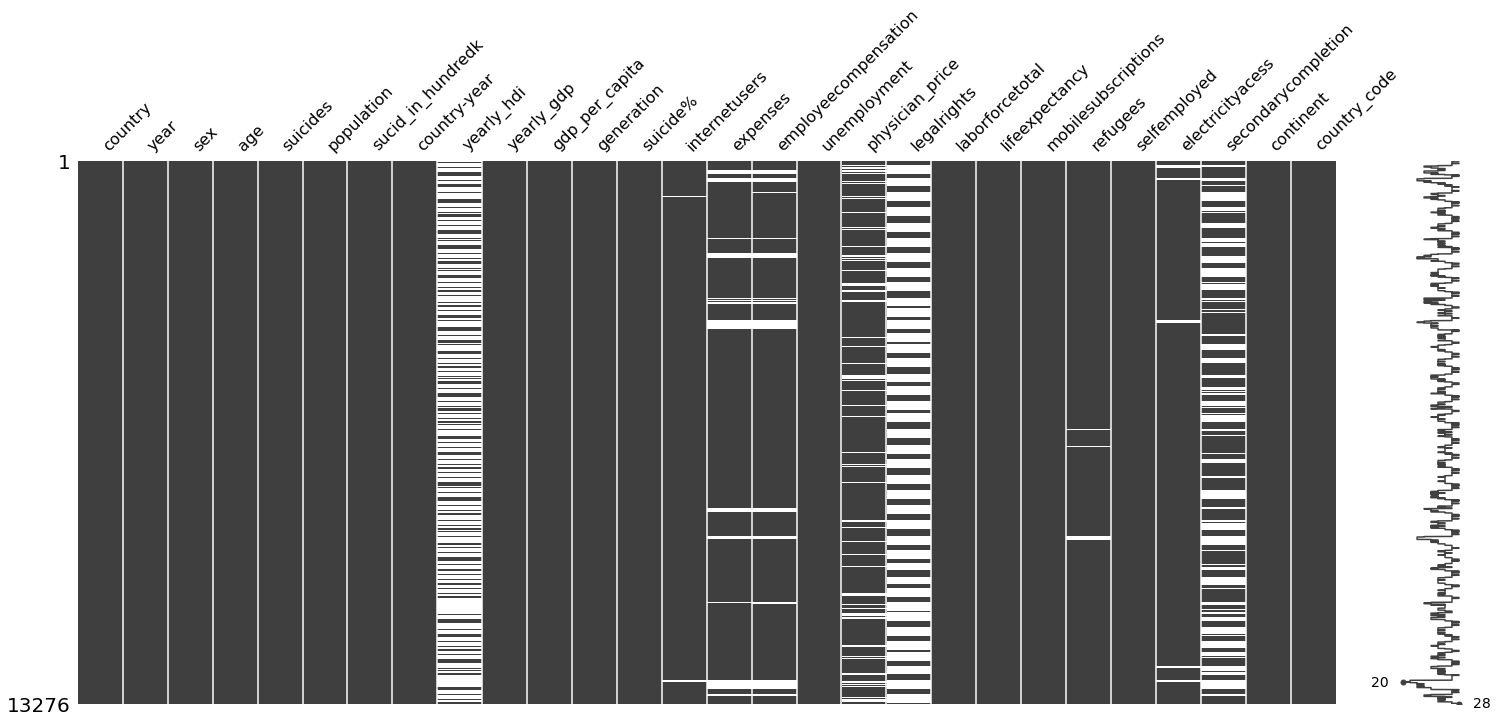

In [22]:
# Useful package for visualizing and understanding missing data
import missingno as msno
import matplotlib.pyplot as plt

# Visualize missingness
msno.matrix(final)
plt.show()

In [23]:
# Isolate missing and complete values aside
missing_hdi = final[final['yearly_hdi'].isna()]
complete_hdi = final[~final['yearly_hdi'].isna()]


In [24]:
missing_hdi.describe()

,year,suicides,population,sucid_in_hundredk,yearly_hdi,yearly_gdp,gdp_per_capita,suicide%,internetusers,expenses,...,unemployment,physician_price,legalrights,laborforcetotal,lifeexpectancy,mobilesubscriptions,refugees,selfemployed,electricityacess,secondarycompletion
count,9124.000000,9124.000000,9.124000e+03,9124.000000,0.0,9.124000e+03,9124.000000,9124.000000,9040.000000,8296.000000,...,9124.000000,7636.000000,3472.000000,9.124000e+03,9124.000000,9124.000000,9028.000000,9124.000000,8872.000000,5776.000000
mean,1999.316528,398.808417,2.675820e+06,14.931306,NaN,4.909546e+11,18993.097545,0.014931,18.721017,18.301408,...,5.227582,1.629947,0.013825,1.046639e+07,46.821799,36.334094,11155.957909,2.075908,60.227276,36.322351
std,7.765484,1254.037008,3.868640e+06,19.189067,NaN,8.412982e+11,17235.005103,0.019189,26.212149,17.180872,...,5.712548,1.717781,0.234786,1.872559e+07,36.850168,45.008328,48186.144109,4.528243,48.284712,44.883387
min,1985.000000,0.000000,4.400000e+03,0.000000,NaN,1.201313e+09,357.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1993.000000,19.000000,4.304650e+05,2.390000,NaN,6.408769e+10,4312.000000,0.002387,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1999.000000,84.000000,1.018677e+06,8.380000,NaN,1.868300e+11,14544.000000,0.008382,3.148128,18.537786,...,4.274000,1.369900,0.000000,2.598586e+06,71.531000,7.696397,16.000000,0.469000,99.146201,0.000000
75%,2006.000000,276.000000,3.394224e+06,20.047500,NaN,4.550400e+11,28390.000000,0.020044,31.288396,34.929966,...,8.522000,3.200000,0.000000,1.125782e+07,78.150000,77.601842,743.000000,1.827000,100.000000,88.745550
max,2016.000000,22338.000000,2.846186e+07,177.610000,NaN,5.231380e+12,103431.000000,0.177609,93.000000,51.714662,...,33.473000,6.615700,4.000000,9.542172e+07,82.931463,165.661017,551744.000000,30.332001,100.000000,111.923260


In [25]:
complete_hdi.describe()

,year,suicides,population,sucid_in_hundredk,yearly_hdi,yearly_gdp,gdp_per_capita,suicide%,internetusers,expenses,...,unemployment,physician_price,legalrights,laborforcetotal,lifeexpectancy,mobilesubscriptions,refugees,selfemployed,electricityacess,secondarycompletion
count,4152.000000,4152.000000,4.152000e+03,4152.000000,4152.000000,4.152000e+03,4152.000000,4152.000000,4152.000000,3828.000000,...,4152.000000,3576.000000,1476.000000,4.152000e+03,4152.000000,4152.000000,4116.000000,4152.000000,4092.000000,2544.000000
mean,2004.635838,280.768064,2.507378e+06,13.047040,0.809491,6.447662e+11,25921.404624,0.013047,34.527586,24.022747,...,6.570720,2.218488,1.552846,1.146377e+07,57.485604,63.618038,9803.329446,2.337049,73.531550,54.537283
std,9.206240,641.986372,3.593958e+06,16.328986,0.087930,1.040453e+12,22564.488900,0.016329,33.744718,17.267104,...,5.987349,1.756878,2.777742,1.796641e+07,33.839620,55.607686,49867.723843,4.623033,43.461442,46.433452
min,1985.000000,0.000000,4.500000e+03,0.000000,0.539000,1.468317e+09,426.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1995.000000,18.000000,4.587632e+05,2.210000,0.746000,9.789109e+10,7612.000000,0.002206,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2010.000000,78.000000,1.008634e+06,7.555000,0.826500,2.580655e+11,19912.000000,0.007554,28.319131,28.512193,...,6.476000,2.597950,0.000000,4.302448e+06,75.581927,72.935384,50.000000,0.660500,100.000000,85.312630
75%,2012.000000,248.250000,3.272471e+06,17.870000,0.884000,5.631100e+11,41184.000000,0.017873,67.089999,38.248283,...,9.146000,3.499100,3.000000,1.752937e+07,80.163415,114.601429,856.000000,2.201000,100.000000,96.620390
max,2014.000000,8073.000000,2.797110e+07,165.960000,0.944000,6.203210e+12,109804.000000,0.165961,96.546800,62.186783,...,30.229000,7.334100,12.000000,9.899009e+07,83.331951,172.121808,396717.000000,31.235001,100.000000,116.367400


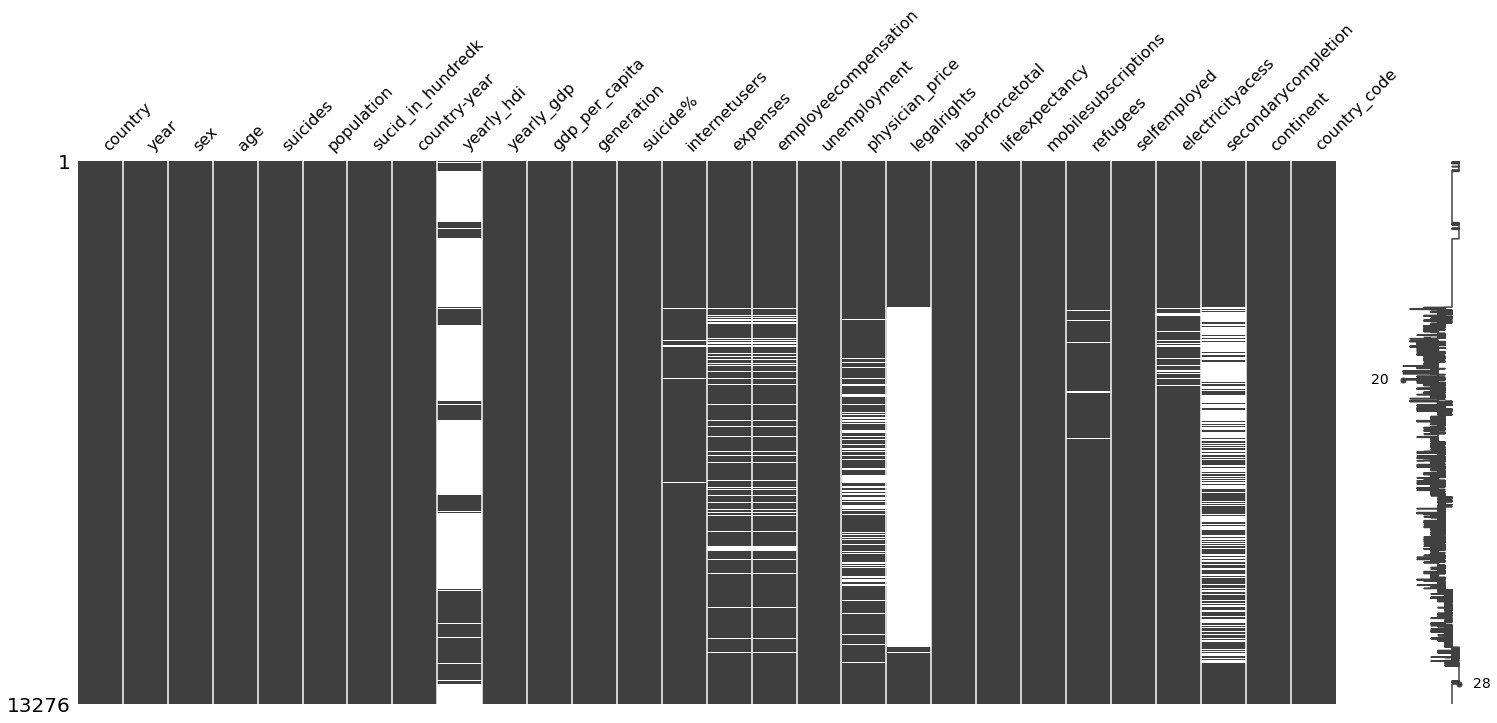

In [26]:
sorted_final = final.sort_values(by = 'year')
msno.matrix(sorted_final)
plt.show()

In [27]:
final.drop('yearly_hdi', axis=1, inplace=True)
final.drop('secondarycompletion', axis=1, inplace=True)
final.drop('legalrights', axis=1, inplace=True)

In [28]:
#checking percentage of missing values
percent_missing = final.isnull().sum() * 100 / len(final)
missing_value_final = pd.DataFrame({'percent_missing': percent_missing})
missing_value_final.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_final

,percent_missing
physician_price,15.546851
employeecompensation,9.038867
expenses,8.677312
electricityacess,2.350105
refugees,0.994275
internetusers,0.632721
continent,0.000000
selfemployed,0.000000
mobilesubscriptions,0.000000
lifeexpectancy,0.000000


in above case yearly_hdi,secondarycompletion and legalrights are missing more than 30%. I will be removing these columns as I am unable to replace the majority of data for them.

In [29]:
final.internetusers=final.internetusers.fillna(final.internetusers	. min())
final.employeecompensation=final.employeecompensation.fillna(final.employeecompensation.mean())
final.electricityacess=final.electricityacess.fillna(final.electricityacess.mean())
final.refugees=final.refugees.fillna(final.refugees.mean())
final.expenses=final.expenses.fillna(final.expenses.mean())
final.physician_price=final.physician_price.fillna(final.physician_price.mean())

In [30]:
percent_missing = final.isnull().sum() * 100 / len(final)
missing_value_final = pd.DataFrame({'percent_missing': percent_missing})
missing_value_final.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_final

,percent_missing
country,0.0
expenses,0.0
continent,0.0
electricityacess,0.0
selfemployed,0.0
refugees,0.0
mobilesubscriptions,0.0
lifeexpectancy,0.0
laborforcetotal,0.0
physician_price,0.0


In [31]:
second_data.year.unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [32]:
final.year.unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [33]:
final.country.unique()

['Argentina', 'Armenia', 'Australia', 'Austria', 'Belgium', ..., 'Sweden', 'Switzerland', 'Thailand', 'Turkmenistan', 'Ukraine']
Length: 39
Categories (39, object): ['Argentina', 'Armenia', 'Australia', 'Austria', ..., 'Switzerland', 'Thailand', 'Turkmenistan', 'Ukraine']

In [34]:
final.head(2)

,country,year,sex,age,suicides,population,sucid_in_hundredk,country-year,yearly_gdp,gdp_per_capita,...,unemployment,physician_price,laborforcetotal,lifeexpectancy,mobilesubscriptions,refugees,selfemployed,electricityacess,continent,country_code
0,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,8.841667e+10,3264,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,Americas,ARG
1,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,8.841667e+10,3264,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,Americas,ARG


In [35]:
final.shape

(13276, 25)

In [36]:
final.columns

Index(['country', 'year', 'sex', 'age', 'suicides', 'population',
       'sucid_in_hundredk', 'country-year', 'yearly_gdp', 'gdp_per_capita',
       'generation', 'suicide%', 'internetusers', 'expenses',
       'employeecompensation', 'unemployment', 'physician_price',
       'laborforcetotal', 'lifeexpectancy', 'mobilesubscriptions', 'refugees',
       'selfemployed', 'electricityacess', 'continent', 'country_code'],
      dtype='object')

In [37]:
final.columns

Index(['country', 'year', 'sex', 'age', 'suicides', 'population',
       'sucid_in_hundredk', 'country-year', 'yearly_gdp', 'gdp_per_capita',
       'generation', 'suicide%', 'internetusers', 'expenses',
       'employeecompensation', 'unemployment', 'physician_price',
       'laborforcetotal', 'lifeexpectancy', 'mobilesubscriptions', 'refugees',
       'selfemployed', 'electricityacess', 'continent', 'country_code'],
      dtype='object')

In [38]:
final['internetusers'] = final['internetusers'].replace(r'^\s*$', np.nan, regex=True)
final['unemployment'] = final['unemployment'].replace(r'^\s*$', np.nan, regex=True)
final['physician_price'] = final['physician_price'].replace(r'^\s*$', np.nan, regex=True)
final['internetusers'] = final['internetusers'].replace(r'^\s*$', np.nan, regex=True)
final['laborforcetotal'] = final['laborforcetotal'].replace(r'^\s*$', np.nan, regex=True)
final['selfemployed'] = final['selfemployed'].replace(r'^\s*$', np.nan, regex=True)
final['electricityacess'] = final['electricityacess'].replace(r'^\s*$', np.nan, regex=True)
final['lifeexpectancy'] = final['lifeexpectancy'].replace(r'^\s*$', np.nan, regex=True)
final['mobilesubscription'] = final['mobilesubscriptions'].replace(r'^\s*$', np.nan, regex=True)
final['refugees'] = final['refugees'].replace(r'^\s*$', np.nan, regex=True)
final['expenses'] = final['expenses'].replace(r'^\s*$', np.nan, regex=True)
final['employeecompensation'] = final['employeecompensation'].replace(r'^\s*$', np.nan, regex=True)
final['physician_price'] = final['physician_price'].replace(r'^\s*$', np.nan, regex=True)

final.fillna(final.mean(), inplace=True)



/home/devendra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  from ipykernel import kernelapp as app


In [39]:
final.loc[ final['internetusers'] == 0 | np.isnan(final['internetusers']), 'internetusers' ] = final['internetusers'].mean()
final.loc[ final['unemployment'] == 0 | np.isnan(final['unemployment']), 'unemployment' ] = final['unemployment'].mean()
final.loc[ final['physician_price'] == 0 | np.isnan(final['physician_price']), 'physician_price' ] = final['physician_price'].min()
final.loc[ final['laborforcetotal'] == 0 | np.isnan(final['laborforcetotal']), 'laborforcetotal' ] = final['laborforcetotal'].mean()
final.loc[ final['selfemployed'] == 0 | np.isnan(final['selfemployed']), 'selfemployed' ] = final['selfemployed'].mean()
final.loc[ final['electricityacess'] == 0 | np.isnan(final['electricityacess']), 'electricityacess' ] = final['electricityacess'].mean()
final.loc[ final['lifeexpectancy'] == 0 | np.isnan(final['lifeexpectancy']), 'lifeexpectancy' ] = final['lifeexpectancy'].mean()
final.loc[ final['mobilesubscriptions'] == 0 | np.isnan(final['mobilesubscriptions']), 'mobilesubscriptions' ] = final['mobilesubscriptions'].mean()
final.loc[ final['refugees'] == 0 | np.isnan(final['refugees']), 'refugees' ] = final['refugees'].mean()
final.loc[ final['expenses'] == 0 | np.isnan(final['expenses']), 'expenses' ] = final['expenses'].mean()
final.loc[ final['employeecompensation'] == 0 | np.isnan(final['employeecompensation']), 'employeecompensation' ] = final['employeecompensation'].mean()
final.loc[ final['physician_price'] == 0 | np.isnan(final['physician_price']), 'physician_price' ] = final['physician_price'].mean()

In [40]:
final

,country,year,sex,age,suicides,population,sucid_in_hundredk,country-year,yearly_gdp,gdp_per_capita,...,physician_price,laborforcetotal,lifeexpectancy,mobilesubscriptions,refugees,selfemployed,electricityacess,continent,country_code,mobilesubscription
0,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,8.841667e+10,3264,...,1.817658,1.077831e+07,50.156848,44.867006,10732.386792,2.157578,64.426681,Americas,ARG,0.0
1,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,8.841667e+10,3264,...,1.817658,1.077831e+07,50.156848,44.867006,10732.386792,2.157578,64.426681,Americas,ARG,0.0
2,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,8.841667e+10,3264,...,1.817658,1.077831e+07,50.156848,44.867006,10732.386792,2.157578,64.426681,Americas,ARG,0.0
3,Argentina,1985,female,55-74 years,210,2304000,9.11,Argentina1985,8.841667e+10,3264,...,1.817658,1.077831e+07,50.156848,44.867006,10732.386792,2.157578,64.426681,Americas,ARG,0.0
4,Argentina,1985,male,25-34 years,177,2234200,7.92,Argentina1985,8.841667e+10,3264,...,1.817658,1.077831e+07,50.156848,44.867006,10732.386792,2.157578,64.426681,Americas,ARG,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14025,Ukraine,2015,female,35-54 years,427,6309963,6.77,Ukraine2015,9.103096e+10,2256,...,1.817658,1.077831e+07,50.156848,44.867006,10732.386792,2.157578,64.426681,Europe,UKR,0.0
14026,Ukraine,2015,female,15-24 years,117,2281055,5.13,Ukraine2015,9.103096e+10,2256,...,1.817658,1.077831e+07,50.156848,44.867006,10732.386792,2.157578,64.426681,Europe,UKR,0.0
14027,Ukraine,2015,female,25-34 years,168,3421535,4.91,Ukraine2015,9.103096e+10,2256,...,1.817658,1.077831e+07,50.156848,44.867006,10732.386792,2.157578,64.426681,Europe,UKR,0.0
14028,Ukraine,2015,male,5-14 years,33,2131084,1.55,Ukraine2015,9.103096e+10,2256,...,1.817658,1.077831e+07,50.156848,44.867006,10732.386792,2.157578,64.426681,Europe,UKR,0.0


In [41]:
final.fillna(final.mean(), inplace=True)

/home/devendra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [42]:
final.shape

(13276, 26)

In [43]:
final.columns

Index(['country', 'year', 'sex', 'age', 'suicides', 'population',
       'sucid_in_hundredk', 'country-year', 'yearly_gdp', 'gdp_per_capita',
       'generation', 'suicide%', 'internetusers', 'expenses',
       'employeecompensation', 'unemployment', 'physician_price',
       'laborforcetotal', 'lifeexpectancy', 'mobilesubscriptions', 'refugees',
       'selfemployed', 'electricityacess', 'continent', 'country_code',
       'mobilesubscription'],
      dtype='object')

In [44]:
# define function called plot_box
def plot_box(final, ft):
    final.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

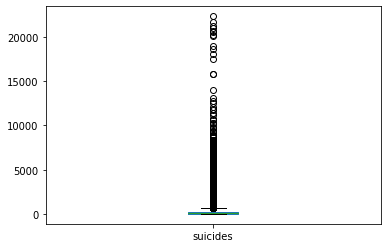

In [45]:
# plot the diagram
plot_box(final, "suicides")

In [46]:
final.suicides

0        202
1        485
2        414
3        210
4        177
        ... 
14025    427
14026    117
14027    168
14028     33
14029     19
Name: suicides, Length: 13276, dtype: int64

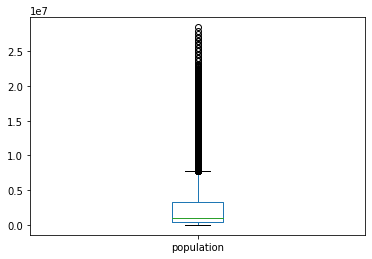

In [47]:
# plot the diagram
plot_box(final, "population")

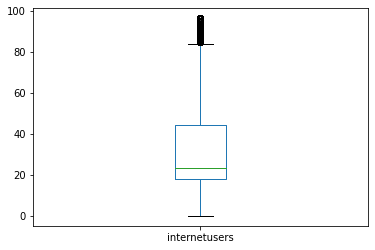

In [48]:
plot_box(final, "internetusers")


In [49]:
final.shape

(13276, 26)

In [50]:
final.columns

Index(['country', 'year', 'sex', 'age', 'suicides', 'population',
       'sucid_in_hundredk', 'country-year', 'yearly_gdp', 'gdp_per_capita',
       'generation', 'suicide%', 'internetusers', 'expenses',
       'employeecompensation', 'unemployment', 'physician_price',
       'laborforcetotal', 'lifeexpectancy', 'mobilesubscriptions', 'refugees',
       'selfemployed', 'electricityacess', 'continent', 'country_code',
       'mobilesubscription'],
      dtype='object')

In [51]:
final.loc[:, 'expenses':'refugees'] = final.loc[:, 'expenses':'refugees'].fillna(final['employeecompensation'].mean()) 

In [52]:
final.isnull().sum()

country                 0
year                    0
sex                     0
age                     0
suicides                0
population              0
sucid_in_hundredk       0
country-year            0
yearly_gdp              0
gdp_per_capita          0
generation              0
suicide%                0
internetusers           0
expenses                0
employeecompensation    0
unemployment            0
physician_price         0
laborforcetotal         0
lifeexpectancy          0
mobilesubscriptions     0
refugees                0
selfemployed            0
electricityacess        0
continent               0
country_code            0
mobilesubscription      0
dtype: int64

In [53]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13276 entries, 0 to 14029
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   country               13276 non-null  category
 1   year                  13276 non-null  int64   
 2   sex                   13276 non-null  category
 3   age                   13276 non-null  category
 4   suicides              13276 non-null  int64   
 5   population            13276 non-null  int64   
 6   sucid_in_hundredk     13276 non-null  float64 
 7   country-year          13276 non-null  object  
 8   yearly_gdp            13276 non-null  float64 
 9   gdp_per_capita        13276 non-null  int64   
 10  generation            13276 non-null  category
 11  suicide%              13276 non-null  float64 
 12  internetusers         13276 non-null  float64 
 13  expenses              13276 non-null  float64 
 14  employeecompensation  13276 non-null  float64 
 15  un

In [54]:
final.groupby(["age"])["sucid_in_hundredk"].max()

age
15-24 years     61.03
25-34 years     94.18
35-54 years    117.30
5-14 years       4.85
55-74 years    103.86
75+ years      177.61
Name: sucid_in_hundredk, dtype: float64

In [55]:
final.groupby(["age"])["sucid_in_hundredk"].mean()

age
15-24 years     9.419292
25-34 years    12.791467
35-54 years    16.427753
5-14 years      0.543037
55-74 years    18.425830
75+ years      28.320153
Name: sucid_in_hundredk, dtype: float64

In [56]:
final.groupby(["age"])["sucid_in_hundredk"].std()

age
15-24 years     8.831583
25-34 years    12.471058
35-54 years    15.622347
5-14 years      0.573569
55-74 years    15.991798
75+ years      29.245087
Name: sucid_in_hundredk, dtype: float64

In [57]:
### Outlier detection and removal
# getting nearest neighbors using knn
# outlier library import
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

nearestn=NearestNeighbors(n_neighbors=2)

nunber of records:  13276


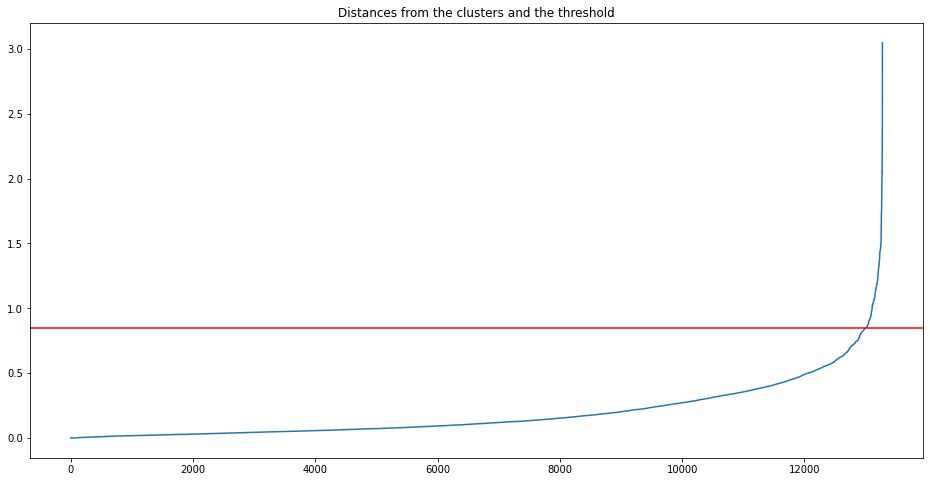

Total 483 are outliers
Estimated number of clusters: 361
Estimated number of noise points: 483
Before removing outliers, total number of records:  13276
After removing outliers, total number of records:  12793


In [58]:
outlier_threshold = 0.85

for_DBSCAN = final.copy()

#getting numerical columns
num_df = for_DBSCAN._get_numeric_data()
num_df = num_df.drop(["year"], axis = 1)
X = StandardScaler().fit_transform(num_df)


# outlier removal function
print("nunber of records: ",len(X))
temp = X.copy()
nbrs=nearestn.fit(temp)
distances,indices=nbrs.kneighbors(temp)
distances=np.sort(distances,axis=0)
distances=distances[:,1]
fig = plt.figure(figsize=(16, 8))
plt.plot(distances)
plt.title("Distances from the clusters and the threshold")
plt.axhline(y=outlier_threshold,color="red")
plt.show()
db = DBSCAN(eps=outlier_threshold, min_samples=3)

db.fit(temp)

for_DBSCAN["clusters"]=db.labels_
outliers_indexes=for_DBSCAN.loc[for_DBSCAN.clusters==-1].index
print(f"Total {len(outliers_indexes)} are outliers")

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

for_DBSCAN=for_DBSCAN.drop(outliers_indexes,axis=0)
for_DBSCAN=for_DBSCAN.drop("clusters",axis=1)

print("Before removing outliers, total number of records: ", len(final))
final=final.drop(outliers_indexes,axis=0)
print("After removing outliers, total number of records: ", len(final))



In [59]:
final.to_csv('../processed_data/output.csv',mode = 'w', index=False)
# outputting data to run models in live server